In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#### Importing the dataset

rating_dataset is the Surprise dataset that can be used when analyzing the full dataset.
<br>
rating_matrix is the numpy array that has columns: userId, movieId, rating, timestamp

In [2]:
from surprise import Reader, Dataset

In [3]:
# Read data set using pandas and surprise. Data is stored in rating_dataset

df=pd.read_csv('ml-latest-small/ratings.csv')
# reader = Reader(rating_scale=(1,5))
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5), skip_lines=1)

rating_dataset = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
rating_matrix = df.values

# Get the all ratings for each movie. Key is movie ID, value of an array of ratings.
ratings_by_movie_id = {}
for row in rating_dataset.raw_ratings:
    if row[1] not in ratings_by_movie_id:
        ratings_by_movie_id[row[1]] = []
    ratings_by_movie_id[row[1]].append(row[2])

# Count number of users and movies.
num_users = np.size(np.unique(rating_matrix[:,0]))
num_movies = np.size(np.unique(rating_matrix[:,1]))

##### Build R Matrix

In [4]:
R = np.zeros([num_users, num_movies])

ratings = np.genfromtxt('ml-latest-small/ratings.csv', delimiter=',')
ratings = np.delete(ratings, (0), axis=0) # Remove column title row
ratings = np.delete(ratings, (3), axis=1) # Remove time stamp column

# Create a dictionary where the key is the movie id and the value is the location in data

movie_ids = {}
counter = 0
for rating in ratings:
    if rating[1] not in movie_ids.keys():
        movie_ids[rating[1]] = counter
        counter += 1
        
# Put ratings into a matrix of size num_users x num_movies. 
# To get the rating of a user for a specific movie, do data[userId - 1, movie_ids[movieId]]

for rating in ratings:
    user = int(rating[0]) - 1
    movie = int(movie_ids[rating[1]])
    R[user, movie] = rating[2]
    
print(R)

[[4.  4.  4.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [2.5 2.  0.  ... 0.  0.  0. ]
 [3.  0.  0.  ... 0.  0.  0. ]
 [5.  0.  5.  ... 3.  3.5 3.5]]


#### Question 1

In [5]:
# Calculate sparsity, defined as: (total number of available ratings) / (total number of possible ratings)

num_available_ratings = np.size(rating_matrix[:,0])
num_possible_ratings = num_users*num_movies

sparsity = num_available_ratings / num_possible_ratings

print('Sparsity = {}'.format(sparsity))

Sparsity = 0.016999683055613623


#### Question 2

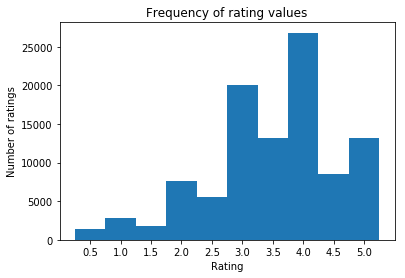

In [6]:
# Plot a histogram showing the frequency of rating values

ratings = rating_matrix[:,2]
plt.figure()
# plt.hist(ratings, 10)
plt.hist(ratings, np.arange(0.5, 6, 0.5))
plt.title('Frequency of rating values')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.xticks(np.arange(0.75, 5.75, 0.5), np.arange(0.5, 5.5, 0.5))
plt.show()

#### Question 3

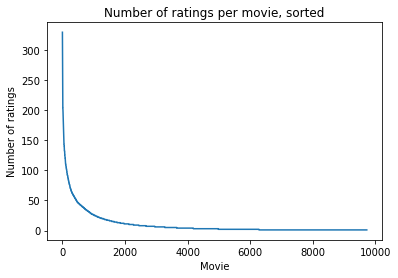

In [7]:
# Distribution of number of ratings received per movie.

movies = rating_matrix[:,1]
movie_id, counts = np.unique(movies, return_counts=True)
counts_sorted = np.sort(counts)[::-1]

plt.figure()
plt.plot(counts_sorted)
plt.title('Number of ratings per movie, sorted')
plt.xlabel('Movie')
plt.ylabel('Number of ratings')
plt.show()

#### Question 4

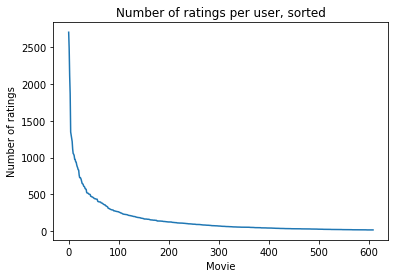

In [8]:
# Distribution of number of ratings given per user

users = rating_matrix[:,0]
user_id, counts = np.unique(users, return_counts=True)
counts_sorted = np.sort(counts)[::-1]

plt.figure()
plt.plot(counts_sorted)
plt.title('Number of ratings per user, sorted')
plt.xlabel('Movie')
plt.ylabel('Number of ratings')
plt.show()

#### Question 6

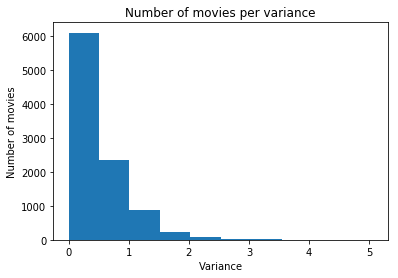

In [9]:
# Histogram of variance in ratings per movie

var_by_movie_id = {}
for key in ratings_by_movie_id.keys():
    var_by_movie_id[key] = np.var(ratings_by_movie_id[key])
    
variances = list(var_by_movie_id.values())

plt.figure()
plt.hist(variances)
plt.title('Number of movies per variance')
plt.xlabel('Variance')
plt.ylabel('Number of movies')
plt.show()

#### Trimming the dataset

The trimmed data set is in a format the Surprise can take as input.

##### Variable names:
Popular movie dataset: rating_popular_dataset 
<br>
Unpopular movie dataset: rating_unpopular_dataset
<br>
High variance movie dataset: rating_highvar_dataset

In [10]:
# # Get the movie ids that are being kept in each trimming. 

# ratings_by_movie_id = {}
# for row in rating_dataset.raw_ratings:
#     if row[1] not in ratings_by_movie_id:
#         ratings_by_movie_id[row[1]] = []
#     ratings_by_movie_id[row[1]].append(row[2])

# var_by_movie_id = {}
# for key in ratings_by_movie_id.keys():
#     var_by_movie_id[key] = np.var(ratings_by_movie_id[key])
    
# pop_movie_ids = [k for k in ratings_by_movie_id if len(ratings_by_movie_id[k]) > 2]
# unpop_movie_ids = [k for k in ratings_by_movie_id if len(ratings_by_movie_id[k]) <= 2]
# highvar_movie_ids = [k for k in var_by_movie_id if var_by_movie_id[k] >= 2 and len(ratings_by_movie_id[k]) >= 5]

In [11]:
# # Make a new dataframe for each trimmed set.

# df = pd.read_csv('ml-latest-small/ratings.csv')
# df_popular = df[df['movieId'].isin(pop_movie_ids)]
# df = pd.read_csv('ml-latest-small/ratings.csv')
# df_unpopular = df[df['movieId'].isin(unpop_movie_ids)]
# df = pd.read_csv('ml-latest-small/ratings.csv')
# df_highvar = df[df['movieId'].isin(highvar_movie_ids)]

In [12]:
# # Make a new surprise Dataset for each trimmed set.

# rating_popular_dataset = Dataset.load_from_df(df_popular[['userId', 'movieId', 'rating']], reader)
# rating_unpopular_dataset = Dataset.load_from_df(df_unpopular[['userId', 'movieId', 'rating']], reader)
# rating_highvar_dataset = Dataset.load_from_df(df_highvar[['userId', 'movieId', 'rating']], reader)

In [13]:
def get_popular(testset):
    ratings_by_movie_id = {}
    for row in testset:
        if row[1] not in ratings_by_movie_id:
            ratings_by_movie_id[row[1]] = []
        ratings_by_movie_id[row[1]].append(row[2])
    testset_pop = [k for k in testset if len(ratings_by_movie_id[k[1]]) > 2]
    return testset_pop

In [14]:
def get_unpopular(testset):
    ratings_by_movie_id = {}
    for row in testset:
        if row[1] not in ratings_by_movie_id:
            ratings_by_movie_id[row[1]] = []
        ratings_by_movie_id[row[1]].append(row[2])
    testset_unpop = [k for k in testset if len(ratings_by_movie_id[k[1]]) <= 2]
    return testset_unpop

In [15]:
def get_highvar(testset):
    ratings_by_movie_id = {}
    for row in testset:
        if row[1] not in ratings_by_movie_id:
            ratings_by_movie_id[row[1]] = []
        ratings_by_movie_id[row[1]].append(row[2])
    var_by_movie_id = {}
    for key in ratings_by_movie_id.keys():
        var_by_movie_id[key] = np.var(ratings_by_movie_id[key])
    testset_highvar = [k for k in testset if len(ratings_by_movie_id[k[1]]) >= 5 and var_by_movie_id[k[1]] >= 2]
    return testset_highvar

#### Trimming the data set

In [16]:
# # Popular movie trimming

# nz_movie = np.count_nonzero(data, axis=0)
# unpop_movies = []
# for i in range(len(nz_movie)):
#     if nz_movie[i] <= 2:
#         unpop_movies.append(i)

# data_popular = np.delete(data, unpop_movies, axis=1)
# # print(np.unique(np.count_nonzero(data_popular, axis=0)))
# # print(data_popular)

In [17]:
# # Unpopular movie trimming

# nz_movie = np.count_nonzero(data, axis=0)
# pop_movies = []
# for i in range(len(nz_movie)):
#     if nz_movie[i] > 2:
#         pop_movies.append(i)
        
# data_unpopular = np.delete(data, pop_movies, axis=1)
# # print(np.unique(np.count_nonzero(data_unpopular, axis=0)))

In [18]:
# # High variance movie trimming

# nz_movie = np.count_nonzero(data, axis=0)
# movies_less5 = []
# for i in range(len(nz_movie)):
#     if nz_movie[i] < 5:
#         movies_less5.append(i)

# data_more5 = np.delete(data, movies_less5, axis=1)

# variances = np.zeros(np.shape(data_more5)[1])
# for i in range(np.shape(data_more5)[1]):
#     variances[i] = np.var(data_more5[:, i])

# lowvar_movies = []
# for i in range(np.shape(data_more5)[1]):
#     if variances[i] < 2:
#         lowvar_movies.append(i)
# data_highvar = np.delete(data_more5, lowvar_movies, axis=1)

# # print(data_highvar.shape)
# # print(np.var(data_highvar[:,13]))

## Question 10

In [19]:
from surprise import KNNBasic, KNNWithMeans
from surprise import evaluate
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import accuracy

In [20]:
ks = np.arange(2, 101, 2)

In [21]:
# Analyze full dataset

rmse_scores = []
mae_scores = []

for k in ks:
    knn = KNNWithMeans(k=k, min_k=1, sim_options={'name': 'pearson', 'user_based': True}, verbose=False)
    result = cross_validate(knn, rating_dataset, measures=['rmse', 'mae'], cv=10)
    
    rmse = np.mean(result['test_rmse'])
    mae = np.mean(result['test_mae'])
    
    print('k = {}'.format(k))
    print('RMSE = {}'.format(rmse))
    print('MAE = {}'.format(mae))
    print(' ')
    
    rmse_scores.append(rmse)
    mae_scores.append(mae)

k = 2
RMSE = 1.0209953625486738
MAE = 0.78828419584946
 
k = 4
RMSE = 0.9441120082404074
MAE = 0.7256543372166349
 
k = 6
RMSE = 0.9196292577410144
MAE = 0.7052086087276463
 
k = 8
RMSE = 0.908844332072583
MAE = 0.6951612419324926
 
k = 10
RMSE = 0.9017095311649452
MAE = 0.6887188884304769
 
k = 12
RMSE = 0.8990098098562717
MAE = 0.6856831163571886
 
k = 14
RMSE = 0.895276991188765
MAE = 0.6832482899516492
 
k = 16
RMSE = 0.8930918221801551
MAE = 0.6808827089394521
 
k = 18
RMSE = 0.8920615832578791
MAE = 0.6795309390253468
 
k = 20
RMSE = 0.8921680242464248
MAE = 0.679659253164047
 
k = 22
RMSE = 0.8908952374377824
MAE = 0.678285115735464
 
k = 24
RMSE = 0.8905697560011552
MAE = 0.6784095657819413
 
k = 26
RMSE = 0.890644431928202
MAE = 0.678724079851322
 
k = 28
RMSE = 0.889455111974694
MAE = 0.677805815564489
 
k = 30
RMSE = 0.8890943334098086
MAE = 0.6769817729631576
 
k = 32
RMSE = 0.8906283180286273
MAE = 0.677803462827293
 
k = 34
RMSE = 0.8903500568241384
MAE = 0.67762757784950

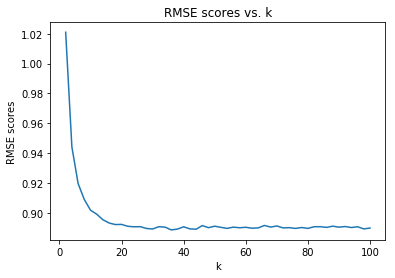

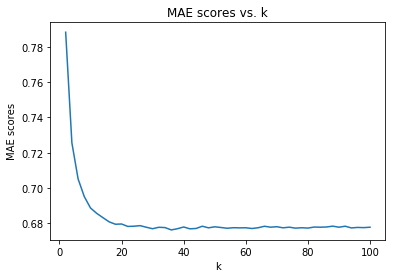

In [22]:
plt.figure()
plt.plot(ks, rmse_scores)
plt.title('RMSE scores vs. k')
plt.xlabel('k')
plt.ylabel('RMSE scores')
plt.show()

plt.figure()
plt.plot(ks, mae_scores)
plt.title('MAE scores vs. k')
plt.xlabel('k')
plt.ylabel('MAE scores')
plt.show()

## Question 11

In [23]:
# Finding the minimum k -- I think this has to be done by observing the graph and not through code.
print('Best k for RMSE: {}'.format(ks[np.argmin(rmse_scores)]))
print('Best k for MAE: {}'.format(ks[np.argmin(mae_scores)]))

Best k for RMSE: 36
Best k for MAE: 36


## Question 12

In [24]:
# Analyze popular dataset.

rmse_popular_scores = []

for k in ks:
    knn = KNNWithMeans(k=k, min_k=1, sim_options={'name': 'pearson', 'user_based': True}, verbose=False)
    kf = KFold(n_splits=10)
    rmse_per_fold = []
    for trainset, testset in kf.split(rating_dataset):
        pop_testset = get_popular(testset)
        knn.fit(trainset)
        predictions = knn.test(pop_testset)
        rmse_per_fold.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse = np.mean(rmse_per_fold)
    rmse_popular_scores.append(avg_rmse)
    print('k = {}'.format(k))
    print('Average RMSE = {}'.format(avg_rmse))
    print(' ')

k = 2
Average RMSE = 1.0191714889894314
 
k = 4
Average RMSE = 0.9273106042739805
 
k = 6
Average RMSE = 0.8997750369313386
 
k = 8
Average RMSE = 0.881135947717666
 
k = 10
Average RMSE = 0.8729603632754911
 
k = 12
Average RMSE = 0.8678084982504466
 
k = 14
Average RMSE = 0.8649705139507329
 
k = 16
Average RMSE = 0.8614760122757797
 
k = 18
Average RMSE = 0.8597912084863213
 
k = 20
Average RMSE = 0.8622667133120864
 
k = 22
Average RMSE = 0.8592587760076563
 
k = 24
Average RMSE = 0.8584960780898095
 
k = 26
Average RMSE = 0.8567014066397212
 
k = 28
Average RMSE = 0.858976158963706
 
k = 30
Average RMSE = 0.8546191301795651
 
k = 32
Average RMSE = 0.8556955228538857
 
k = 34
Average RMSE = 0.8582128854620577
 
k = 36
Average RMSE = 0.8563832610540162
 
k = 38
Average RMSE = 0.8576805728887129
 
k = 40
Average RMSE = 0.856225237119664
 
k = 42
Average RMSE = 0.8587619029646657
 
k = 44
Average RMSE = 0.8569649502211452
 
k = 46
Average RMSE = 0.8584484876315338
 
k = 48
Average RMS

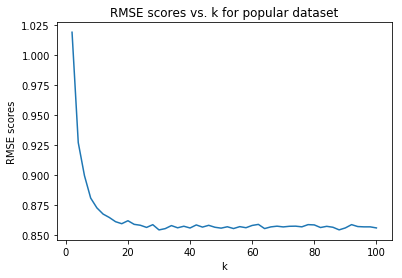

In [25]:
plt.figure()
plt.plot(ks, rmse_popular_scores)
plt.title('RMSE scores vs. k for popular dataset')
plt.xlabel('k')
plt.ylabel('RMSE scores')
plt.show()

In [26]:
print('Best k for RMSE: {}'.format(ks[np.argmin(rmse_popular_scores)]))

Best k for RMSE: 30


## Question 13

In [27]:
# Unpopular Movie Trimmed Test Set

# Analyze unpopular dataset

rmse_unpopular_scores = []

for k in ks:
    knn = KNNWithMeans(k=k, min_k=1, sim_options={'name': 'pearson', 'user_based': True}, verbose=False)
    kf = KFold(n_splits=10)
    rmse_per_fold = []
    for trainset, testset in kf.split(rating_dataset):
        unpop_testset = get_unpopular(testset)
        knn.fit(trainset)
        predictions = knn.test(unpop_testset)
        rmse_per_fold.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse = np.mean(rmse_per_fold)
    rmse_unpopular_scores.append(avg_rmse)
    print('k = {}'.format(k))
    print("Average RMSE = {}".format(avg_rmse))
    print(' ')

k = 2
Average RMSE = 1.017553500529132
 
k = 4
Average RMSE = 0.9753092095449805
 
k = 6
Average RMSE = 0.9671824114058281
 
k = 8
Average RMSE = 0.9609923835772001
 
k = 10
Average RMSE = 0.9587077392129902
 
k = 12
Average RMSE = 0.9579805478078927
 
k = 14
Average RMSE = 0.9529021255096481
 
k = 16
Average RMSE = 0.9581273515720612
 
k = 18
Average RMSE = 0.9580875030552385
 
k = 20
Average RMSE = 0.9571357354645509
 
k = 22
Average RMSE = 0.9536339645391074
 
k = 24
Average RMSE = 0.9600229982845734
 
k = 26
Average RMSE = 0.9575536516756331
 
k = 28
Average RMSE = 0.9542163377485228
 
k = 30
Average RMSE = 0.9565423312627509
 
k = 32
Average RMSE = 0.9555645564975419
 
k = 34
Average RMSE = 0.9600695588153254
 
k = 36
Average RMSE = 0.9547829715241315
 
k = 38
Average RMSE = 0.9563866865649537
 
k = 40
Average RMSE = 0.9604294461763695
 
k = 42
Average RMSE = 0.9561538775962383
 
k = 44
Average RMSE = 0.9600440946938074
 
k = 46
Average RMSE = 0.9588095455121108
 
k = 48
Average R

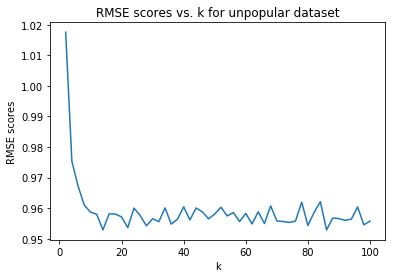

In [28]:
plt.figure()
plt.plot(ks, rmse_unpopular_scores)
plt.title('RMSE scores vs. k for unpopular dataset')
plt.xlabel('k')
plt.ylabel('RMSE scores')
plt.show()

In [29]:
print('Best k for RMSE: {}'.format(ks[np.argmin(rmse_unpopular_scores)]))

Best k for RMSE: 86


## Question 14

In [30]:
# Analyze high variance dataset with KNN

rmse_highvar_scores = []

for k in ks:
    knn = KNNWithMeans(k=k, min_k=1, sim_options={'name': 'pearson', 'user_based': True}, verbose=False)
    kf = KFold(n_splits=10)
    rmse_per_fold = []
    for trainset, testset in kf.split(rating_dataset):
        highvar_testset = get_highvar(testset)
        knn.fit(trainset)
        predictions = knn.test(highvar_testset)
        rmse_per_fold.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse = np.mean(rmse_per_fold)
    rmse_highvar_scores.append(avg_rmse)
    print('k = {}'.format(k))
    print('Average RMSE = {}'.format(avg_rmse))
    print(' ')

k = 2
Average RMSE = 1.5181733220848599
 
k = 4
Average RMSE = 1.4604698989009604
 
k = 6
Average RMSE = 1.4174598494839308
 
k = 8
Average RMSE = 1.4013110188026208
 
k = 10
Average RMSE = 1.3836196797034035
 
k = 12
Average RMSE = 1.401229605819944
 
k = 14
Average RMSE = 1.3963240628920512
 
k = 16
Average RMSE = 1.3948399636381805
 
k = 18
Average RMSE = 1.379738147275069
 
k = 20
Average RMSE = 1.3937034327470816
 
k = 22
Average RMSE = 1.426938881206872
 
k = 24
Average RMSE = 1.3674301030170186
 
k = 26
Average RMSE = 1.4162342579785636
 
k = 28
Average RMSE = 1.400649716383434
 
k = 30
Average RMSE = 1.3900476531362276
 
k = 32
Average RMSE = 1.4163869666856617
 
k = 34
Average RMSE = 1.3993285014696588
 
k = 36
Average RMSE = 1.4021463005426538
 
k = 38
Average RMSE = 1.4062350400724202
 
k = 40
Average RMSE = 1.4380655032204737
 
k = 42
Average RMSE = 1.411964837752262
 
k = 44
Average RMSE = 1.4152938364271086
 
k = 46
Average RMSE = 1.4284502597321374
 
k = 48
Average RMSE 

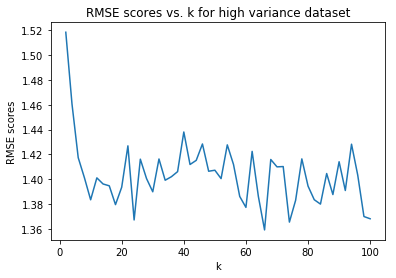

In [31]:
plt.figure()
plt.plot(ks, rmse_highvar_scores)
plt.title('RMSE scores vs. k for high variance dataset')
plt.xlabel('k')
plt.ylabel('RMSE scores')
plt.show()

In [32]:
print('Best k for RMSE: {}'.format(ks[np.argmin(rmse_highvar_scores)]))

Best k for RMSE: 66


## Question 15

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from surprise.model_selection import train_test_split

In [34]:
thresholds = [2.5, 3, 3.5, 4]
best_k = 64

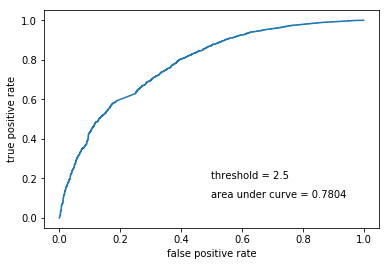

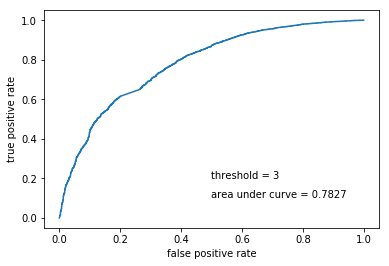

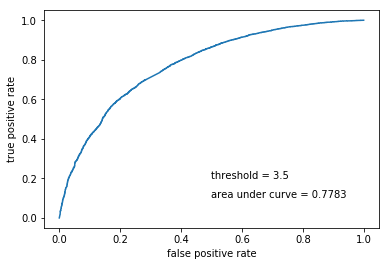

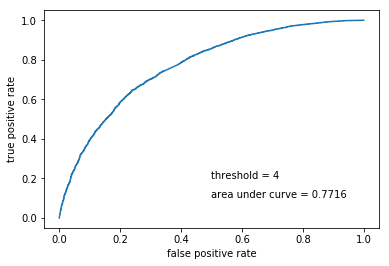

In [35]:
knn = KNNWithMeans(k=best_k, min_k=1, sim_options={'name': 'pearson', 'user_based': True}, verbose=False)
trainset, testset = train_test_split(rating_dataset, test_size=0.1)
knn.fit(trainset)
predictions = knn.test(testset)
for t in thresholds:
    true_bin = [1 if pred.r_ui >= t else 0 for pred in predictions]
    scores = [pred.est for pred in predictions]
    
    plt.figure()
    fpr, tpr, thr = roc_curve(true_bin, scores)
    plt.plot(fpr, tpr)
    plt.text(0.5, 0.1, 'area under curve = %0.4f' % roc_auc_score(true_bin, scores))
    plt.text(0.5, 0.2, 'threshold = {}'.format(t))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

### NMF

In [36]:
from surprise import NMF
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import accuracy

#### Question 17, 18

In [37]:
ks = np.arange(2, 51, 2)

In [38]:
# from surprise.model_selection import KFold

# nmf = NMF(n_factors=2)
# kf = KFold(n_splits=10)
# for trainset, testset in kf.split(rating_dataset):
#     pop_testset = get_popular(testset)
#     nmf.fit(trainset)
#     predictions = nmf.test(testset)
#     print(accuracy.rmse(predictions, verbose=True))

In [39]:
# Analyze full dataset

rmse_scores = []
mae_scores = []

for k in ks:
    nmf = NMF(n_factors=k)
    result = cross_validate(nmf, rating_dataset, measures=['rmse', 'mae'], cv=10)
    
    rmse = np.mean(result['test_rmse'])
    mae = np.mean(result['test_mae'])
    
    print('k = {}'.format(k))
    print(rmse)
    print(mae)
    print(' ')
    
    rmse_scores.append(rmse)
    mae_scores.append(mae)

k = 2
1.146128962595108
0.9633459240639326
 
k = 4
1.038383813636784
0.8486986736662928
 
k = 6
0.9823324917773434
0.7865541382157435
 
k = 8
0.9496199333586404
0.7481533724714058
 
k = 10
0.9314443106560676
0.7259302945247932
 
k = 12
0.9210761642980326
0.7115466011035502
 
k = 14
0.9144861561435963
0.7021084713569101
 
k = 16
0.9148780522677908
0.6992663499500555
 
k = 18
0.9130071174361243
0.6954223879718207
 
k = 20
0.9161478467533197
0.6946295498184482
 
k = 22
0.9176507156865028
0.6944643805654339
 
k = 24
0.9177233749984796
0.6939372512642524
 
k = 26
0.9229385713258633
0.6968238017163783
 
k = 28
0.9276856957846267
0.6994940232626338
 
k = 30
0.9295714060595397
0.7008020368403112
 
k = 32
0.9342584535349421
0.7045218758695391
 
k = 34
0.9371080777287288
0.7059225995499626
 
k = 36
0.9433335622709981
0.7097746184428132
 
k = 38
0.9474380742801284
0.7129769018248127
 
k = 40
0.9504879560115465
0.7158052961427133
 
k = 42
0.9529910031439559
0.7181296564407144
 
k = 44
0.9571818297

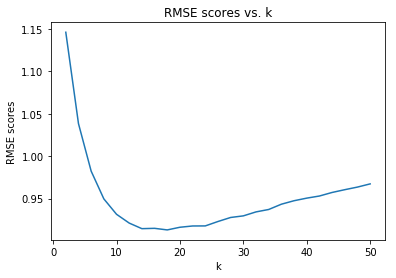

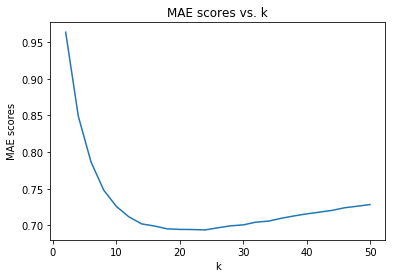

In [40]:
plt.figure()
plt.plot(ks, rmse_scores)
plt.title('RMSE scores vs. k')
plt.xlabel('k')
plt.ylabel('RMSE scores')
plt.show()

plt.figure()
plt.plot(ks, mae_scores)
plt.title('MAE scores vs. k')
plt.xlabel('k')
plt.ylabel('MAE scores')
plt.show()

In [41]:
print('Best k for RMSE: {}'.format(ks[np.argmin(rmse_scores)]))
print('Best k for MAE: {}'.format(ks[np.argmin(mae_scores)]))

Best k for RMSE: 18
Best k for MAE: 24


#### Question 19

In [42]:
# Analyze popular dataset.

rmse_popular_scores = []

for k in ks:
    nmf = NMF(n_factors=k)
    kf = KFold(n_splits=10)
    rmse_per_fold = []
    for trainset, testset in kf.split(rating_dataset):
        pop_testset = get_popular(testset)
        nmf.fit(trainset)
        predictions = nmf.test(pop_testset)
        rmse_per_fold.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse = np.mean(rmse_per_fold)
    rmse_popular_scores.append(avg_rmse)
    print('k = {}'.format(k))
    print(avg_rmse)
    print(' ')

k = 2
1.137866230223612
 
k = 4
1.015006432671863
 
k = 6
0.9464596979136299
 
k = 8
0.9080105592468012
 
k = 10
0.8891814730695774
 
k = 12
0.879751153344684
 
k = 14
0.8727754751853134
 
k = 16
0.8708652305299026
 
k = 18
0.8745410493005987
 
k = 20
0.8767621543186458
 
k = 22
0.8784568738053051
 
k = 24
0.884458015742044
 
k = 26
0.8874450933556082
 
k = 28
0.8901248180080803
 
k = 30
0.899450705003391
 
k = 32
0.9025220089825566
 
k = 34
0.9073762853140448
 
k = 36
0.914915158629183
 
k = 38
0.9173164281390618
 
k = 40
0.9211253653464541
 
k = 42
0.9297956201880743
 
k = 44
0.9331796165260975
 
k = 46
0.9350164047942051
 
k = 48
0.940632426978399
 
k = 50
0.9468359003726363
 


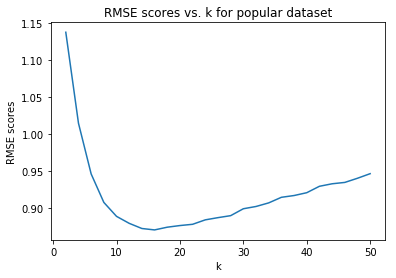

In [43]:
plt.figure()
plt.plot(ks, rmse_popular_scores)
plt.title('RMSE scores vs. k for popular dataset')
plt.xlabel('k')
plt.ylabel('RMSE scores')
plt.show()

In [44]:
print('Best k for RMSE: {}'.format(ks[np.argmin(rmse_popular_scores)]))

Best k for RMSE: 16


#### Question 20

In [45]:
# Analyze unpopular dataset

rmse_unpopular_scores = []

for k in ks:
    nmf = NMF(n_factors=k)
    kf = KFold(n_splits=10)
    rmse_per_fold = []
    for trainset, testset in kf.split(rating_dataset):
        unpop_testset = get_unpopular(testset)
        nmf.fit(trainset)
        predictions = nmf.test(unpop_testset)
        rmse_per_fold.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse = np.mean(rmse_per_fold)
    rmse_unpopular_scores.append(avg_rmse)
    print('k = {}'.format(k))
    print(avg_rmse)
    print(' ')

k = 2
1.1638167476675376
 
k = 4
1.0912186431256956
 
k = 6
1.0500479054837009
 
k = 8
1.0297314886793958
 
k = 10
1.0175771274289864
 
k = 12
1.0053615971571124
 
k = 14
0.9981624983528752
 
k = 16
0.9992551793344671
 
k = 18
0.9957316693071325
 
k = 20
0.9966558281624815
 
k = 22
0.9906676004296052
 
k = 24
0.9958524584322817
 
k = 26
0.9957688876178536
 
k = 28
0.9955408868295657
 
k = 30
0.995533504394856
 
k = 32
1.0012194637437506
 
k = 34
1.003105118881769
 
k = 36
1.0077264842824123
 
k = 38
1.0028041234679037
 
k = 40
1.0045793302584425
 
k = 42
1.00463718632026
 
k = 44
1.0087941252996182
 
k = 46
1.0127566877584928
 
k = 48
1.0125418453216892
 
k = 50
1.0166510085897098
 


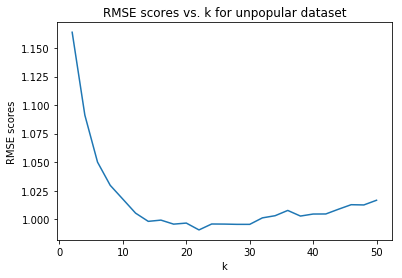

In [46]:
plt.figure()
plt.plot(ks, rmse_unpopular_scores)
plt.title('RMSE scores vs. k for unpopular dataset')
plt.xlabel('k')
plt.ylabel('RMSE scores')
plt.show()

In [47]:
print('Best k for RMSE: {}'.format(ks[np.argmin(rmse_unpopular_scores)]))

Best k for RMSE: 22


#### Question 21

In [49]:
# Analyze high variance dataset

rmse_highvar_scores = []

for k in ks:
    nmf = NMF(n_factors=k)
    kf = KFold(n_splits=10)
    rmse_per_fold = []
    for trainset, testset in kf.split(rating_dataset):
        highvar_testset = get_highvar(testset)
        nmf.fit(trainset)
        predictions = nmf.test(highvar_testset)
        rmse_per_fold.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse = np.mean(rmse_per_fold)
    rmse_highvar_scores.append(avg_rmse)
    print('k = {}'.format(k))
    print(avg_rmse)
    print(' ')

k = 2
1.462199615456143
 
k = 4
1.4275058714139164
 
k = 6
1.3819990911907392
 
k = 8
1.3948323264929272
 
k = 10
1.3941022755691912
 
k = 12
1.4000956803844506
 
k = 14
1.3986491221195103
 
k = 16
1.4250211388834324
 
k = 18
1.4132684902594232
 
k = 20
1.4336694976119924
 
k = 22
1.467830136477057
 
k = 24
1.4487020337905268
 
k = 26
1.4818124450938417
 
k = 28
1.4344190964434345
 
k = 30
1.454007765919362
 
k = 32
1.4504688894017068
 
k = 34
1.4624392640224577
 
k = 36
1.5204698208432623
 
k = 38
1.465358340944009
 
k = 40
1.5048406288522385
 
k = 42
1.494536088390023
 
k = 44
1.5482132729750924
 
k = 46
1.5379723423181004
 
k = 48
1.564704517733078
 
k = 50
1.5333582843369862
 


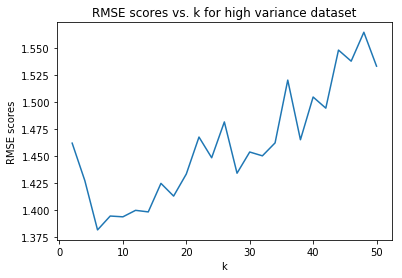

In [50]:
plt.figure()
plt.plot(ks, rmse_highvar_scores)
plt.title('RMSE scores vs. k for high variance dataset')
plt.xlabel('k')
plt.ylabel('RMSE scores')
plt.show()

In [51]:
print('Best k for RMSE: {}'.format(ks[np.argmin(rmse_highvar_scores)]))

Best k for RMSE: 6


#### Question 22

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from surprise import NMF
from surprise.model_selection import train_test_split

In [53]:
thresholds = [2.5, 3, 3.5, 4]
best_k = 16

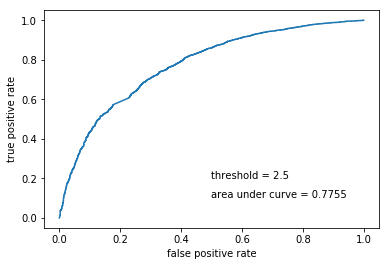

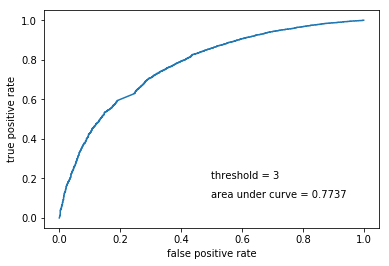

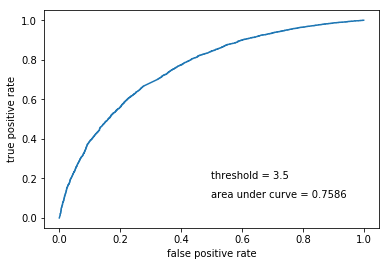

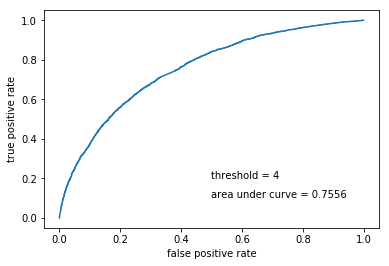

In [54]:
nmf = NMF(n_factors=best_k)
trainset, testset = train_test_split(rating_dataset, test_size=0.1)
nmf.fit(trainset)
predictions = nmf.test(testset)
for t in thresholds:
    true_bin = [1 if pred.r_ui >= t else 0 for pred in predictions]
    scores = [pred.est for pred in predictions]
    
    plt.figure()
    fpr, tpr, thr = roc_curve(true_bin, scores)
    plt.plot(fpr, tpr)
    plt.text(0.5, 0.1, 'area under curve = %0.4f' % roc_auc_score(true_bin, scores))
    plt.text(0.5, 0.2, 'threshold = {}'.format(t))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

#### Question 23

In [55]:
from surprise import NMF

In [56]:
df=pd.read_csv('ml-latest-small/ratings.csv')
df_movies=pd.read_csv('ml-latest-small/movies.csv')
nmf = NMF(n_factors=20, random_state=0)
nmf.fit(rating_dataset.build_full_trainset())
V = nmf.qi

In [57]:
for f in range(20):
    temp = [[V[:,f][k], k] for k in range(np.size(V[:,0]))]
    temp.sort(key=lambda x: x[0])
    temp.reverse()
    print('Feature {} top 10 genres'.format(f+1))
    for i in range(10):
        print(df_movies['genres'][temp[i][1]])
    print(' ')

Feature 1 top 10 genres
Comedy|Drama|Romance
Horror|Sci-Fi
Crime|Drama|Musical
Comedy|Drama|Romance
Drama|Romance
Comedy
Drama|Mystery|Sci-Fi|Thriller
Drama
Drama
Drama|Thriller|War
 
Feature 2 top 10 genres
Drama|Western
Drama|Musical
Film-Noir|Thriller
Comedy
Comedy|Romance
Comedy
Action|Comedy
Action|Crime|Thriller
Horror|Sci-Fi|Thriller
Children|Comedy
 
Feature 3 top 10 genres
Comedy|Drama|Romance
Horror|Thriller
Drama
Drama|Romance
Adventure|Children
Drama|Romance
Drama
Crime|Drama|Film-Noir|Thriller
Drama
Adventure|Children|Comedy|Mystery
 
Feature 4 top 10 genres
Drama
Children|Drama
Thriller
Action|Adventure|Fantasy|Sci-Fi
Comedy|Romance
Comedy
Action|Adventure|Comedy
Documentary
Comedy|Crime
Comedy|Romance
 
Feature 5 top 10 genres
Drama
Horror|Thriller
Drama
Action|Comedy|Sci-Fi
Comedy
Drama
Drama
Comedy
Comedy|Drama|Thriller
Crime|Drama
 
Feature 6 top 10 genres
Documentary
Comedy
Comedy|Drama|Romance
Horror
Adventure|Animation|Children|Comedy
Drama
Comedy|Drama
Crime|Fanta

### MF with Bias

#### Question 24

Design a MF with bias collaborative filter on full data set.

In [58]:
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import accuracy

In [59]:
ks = np.arange(2, 51, 2)

# MF with Bias, Full data set

rmse_scores = []
mae_scores = []

for k in ks:
    svd = SVD(n_factors=k)
    result = cross_validate(svd, rating_dataset, cv = 10)
    
    rmse = np.mean(result['test_rmse'])
    mae = np.mean(result['test_mae'])
    
    print('k = {}'.format(k))
    print(rmse)
    print(mae)
    print(' ')
    
    rmse_scores.append(rmse)
    mae_scores.append(mae)

k = 2
0.8670574662586743
0.6655094207803763
 
k = 4
0.8664564795842713
0.6658729354877889
 
k = 6
0.8665738691849052
0.6655752271967791
 
k = 8
0.8655244939306315
0.6649137919222816
 
k = 10
0.866101044190436
0.6654378911368927
 
k = 12
0.8666454379717479
0.6651755351459773
 
k = 14
0.8659006845427646
0.6650933251613853
 
k = 16
0.8654168032582605
0.6647799785737074
 
k = 18
0.8658289421973773
0.6648729168406172
 
k = 20
0.8653052426350486
0.664546192291952
 
k = 22
0.8660702258856414
0.6651053957905203
 
k = 24
0.8658254582315182
0.6650279083905608
 
k = 26
0.8650320745151244
0.6641895465236154
 
k = 28
0.8651056091994226
0.6643125483188628
 
k = 30
0.8655501602389164
0.6644067631527799
 
k = 32
0.8655273325500961
0.664577974632477
 
k = 34
0.8662064361049844
0.6649665331258856
 
k = 36
0.8658574992160444
0.6646391404639622
 
k = 38
0.8656549842121406
0.6647690350909545
 
k = 40
0.8662056928123268
0.6647353836201789
 
k = 42
0.86526955816562
0.6640776876193643
 
k = 44
0.8669759491956

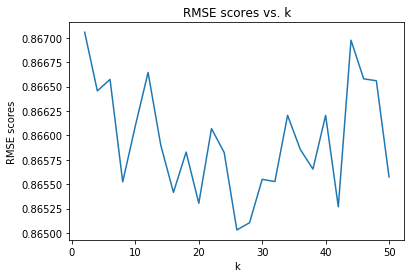

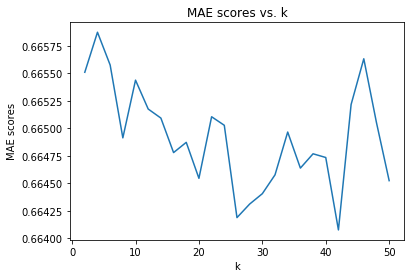

In [60]:
plt.figure()
plt.plot(ks, rmse_scores)
plt.title('RMSE scores vs. k')
plt.xlabel('k')
plt.ylabel('RMSE scores')
plt.show()

plt.figure()
plt.plot(ks, mae_scores)
plt.title('MAE scores vs. k')
plt.xlabel('k')
plt.ylabel('MAE scores')
plt.show()

#### Question 25
Find the optimal value of k.

In [61]:
best_k_MF_bias = ks[np.argmin(rmse_scores)]

print('Best k for RMSE: {}'.format(best_k_MF_bias))
print('Best k for MAE: {}'.format(ks[np.argmin(mae_scores)]))

print('Min average value for RMSE:', np.amin(rmse_scores))
print('Min average value for MAE:', np.amin(mae_scores))

Best k for RMSE: 26
Best k for MAE: 42
Min average value for RMSE: 0.8650320745151244
Min average value for MAE: 0.6640776876193643


#### Question 26
Design a MF with bias collaborative filter on popular movie trimmed test set.

In [62]:
# MF with Bias, Analyze popular dataset

rmse_popular_scores = []

for k in ks:
    svd = SVD(n_factors=k)
    kf = KFold(n_splits=10)
    rmse_per_fold = []
    for trainset, testset in kf.split(rating_dataset):
        pop_testset = get_popular(testset)
        svd.fit(trainset)
        predictions = svd.test(pop_testset)
        rmse_per_fold.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse = np.mean(rmse_per_fold)
    rmse_popular_scores.append(avg_rmse)
    print('k = {}'.format(k))
    print(avg_rmse)
    print(' ')

k = 2
0.8487469604121213
 
k = 4
0.8513760532016921
 
k = 6
0.8514866569952048
 
k = 8
0.8480233213813231
 
k = 10
0.8495245671412851
 
k = 12
0.8489807216612171
 
k = 14
0.8515473648111257
 
k = 16
0.8478553975598644
 
k = 18
0.8489294825741679
 
k = 20
0.8484186751578022
 
k = 22
0.8482395261749085
 
k = 24
0.8497943071828968
 
k = 26
0.8459684486924625
 
k = 28
0.8483377911324423
 
k = 30
0.848977314782519
 
k = 32
0.8489426349908541
 
k = 34
0.8471815469543674
 
k = 36
0.8480533756554017
 
k = 38
0.8502033082595737
 
k = 40
0.848960400028276
 
k = 42
0.8457769087427284
 
k = 44
0.8490085875727592
 
k = 46
0.8491714081954742
 
k = 48
0.8458828074776144
 
k = 50
0.8452120559192975
 


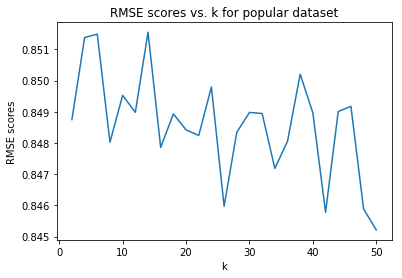

In [63]:
plt.figure()
plt.plot(ks, rmse_popular_scores)
plt.title('RMSE scores vs. k for popular dataset')
plt.xlabel('k')
plt.ylabel('RMSE scores')
plt.show()

In [64]:
print('Best k for RMSE: {}'.format(ks[np.argmin(rmse_popular_scores)]))
print('Min average value for RMSE:', np.amin(rmse_popular_scores))

Best k for RMSE: 50
Min average value for RMSE: 0.8452120559192975


#### Question 27
Design a MF with bias collaborative filter on unpopular movie trimmed test set.

In [65]:
# MF with Bias, Analyze unpopular dataset

rmse_unpopular_scores = []

for k in ks:
    svd = SVD(n_factors=k)
    kf = KFold(n_splits=10)
    rmse_per_fold = []
    for trainset, testset in kf.split(rating_dataset):
        unpop_testset = get_unpopular(testset)
        svd.fit(trainset)
        predictions = svd.test(unpop_testset)
        rmse_per_fold.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse = np.mean(rmse_per_fold)
    rmse_unpopular_scores.append(avg_rmse)
    print('k = {}'.format(k))
    print(avg_rmse)
    print(' ')

k = 2
0.9004344323789937
 
k = 4
0.9019851556784981
 
k = 6
0.8995168985793315
 
k = 8
0.9032977364172089
 
k = 10
0.9034192724032468
 
k = 12
0.9023005436009971
 
k = 14
0.9041187633997451
 
k = 16
0.9049139592609965
 
k = 18
0.9033595193785853
 
k = 20
0.9004802744245402
 
k = 22
0.8991509633452693
 
k = 24
0.9018518348450859
 
k = 26
0.9010403794057487
 
k = 28
0.9052199313992556
 
k = 30
0.9037205406158902
 
k = 32
0.9025097402288855
 
k = 34
0.9032253469612677
 
k = 36
0.9021512757908189
 
k = 38
0.9070316322778702
 
k = 40
0.9058117169305693
 
k = 42
0.8997654286940543
 
k = 44
0.9045349508496162
 
k = 46
0.9074571329764147
 
k = 48
0.9029311153310544
 
k = 50
0.9068387408014507
 


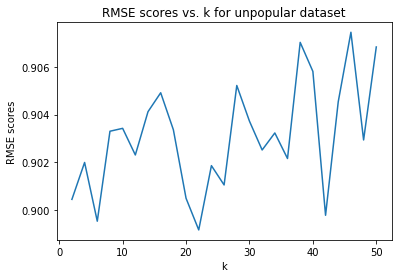

In [66]:
plt.figure()
plt.plot(ks, rmse_unpopular_scores)
plt.title('RMSE scores vs. k for unpopular dataset')
plt.xlabel('k')
plt.ylabel('RMSE scores')
plt.show()

In [67]:
print('Best k for RMSE: {}'.format(ks[np.argmin(rmse_unpopular_scores)]))
print('Min average value for RMSE:', np.amin(rmse_unpopular_scores))

Best k for RMSE: 22
Min average value for RMSE: 0.8991509633452693


#### Question 28
Design a MF with bias collaborative filter on high variance movie trimmed test set.

In [68]:
# MF with Bias, Analyze high variance dataset

rmse_highvar_scores = []

for k in ks:
    svd = SVD(n_factors=k)
    kf = KFold(n_splits=10)
    rmse_per_fold = []
    for trainset, testset in kf.split(rating_dataset):
        highvar_testset = get_highvar(testset)
        svd.fit(trainset)
        predictions = svd.test(highvar_testset)
        rmse_per_fold.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse = np.mean(rmse_per_fold)
    rmse_highvar_scores.append(avg_rmse)
    print('k = {}'.format(k))
    print(avg_rmse)
    print(' ')

k = 2
1.4090909741597701
 
k = 4
1.4194632961877662
 
k = 6
1.4253883229352577
 
k = 8
1.4138062484223075
 
k = 10
1.4165275296041488
 
k = 12
1.406686811129402
 
k = 14
1.3962040093415855
 
k = 16
1.4494224060198426
 
k = 18
1.3517553880939661
 
k = 20
1.3957468511976725
 
k = 22
1.4342078030114178
 
k = 24
1.3985358738763058
 
k = 26
1.4103543861313126
 
k = 28
1.3971647337641429
 
k = 30
1.3735336747570992
 
k = 32
1.4130320435624846
 
k = 34
1.3980986378008455
 
k = 36
1.3792668360481284
 
k = 38
1.3794388408559795
 
k = 40
1.4299990065766202
 
k = 42
1.4050755641826957
 
k = 44
1.44027459106155
 
k = 46
1.4165063474827533
 
k = 48
1.3549724492550073
 
k = 50
1.397714519857993
 


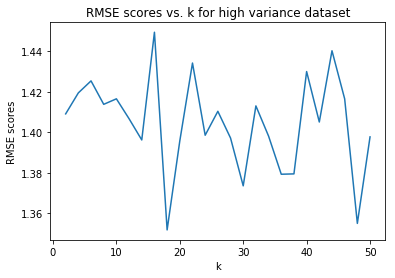

In [69]:
plt.figure()
plt.plot(ks, rmse_highvar_scores)
plt.title('RMSE scores vs. k for high variance dataset')
plt.xlabel('k')
plt.ylabel('RMSE scores')
plt.show()

In [70]:
print('Best k for RMSE: {}'.format(ks[np.argmin(rmse_highvar_scores)]))
print('Min average value for RMSE:', np.amin(rmse_highvar_scores))

Best k for RMSE: 18
Min average value for RMSE: 1.3517553880939661


#### Question 29
Plot ROC cures from Question 24 with optimal k value. Specify AUC.

In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from surprise.model_selection import train_test_split

In [72]:
thresholds = [2.5, 3, 3.5, 4]

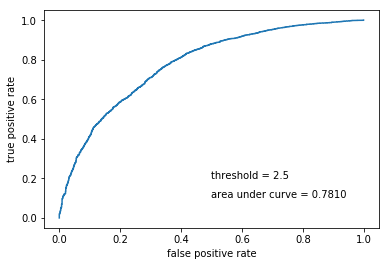

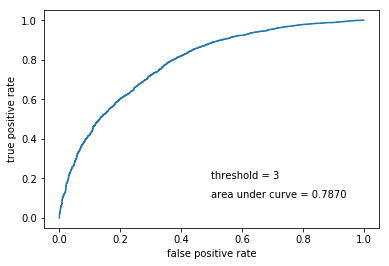

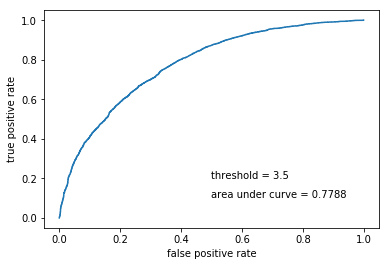

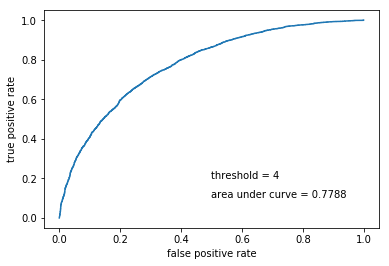

In [73]:
svd = SVD(n_factors=best_k_MF_bias)
trainset, testset = train_test_split(rating_dataset, test_size=0.1)
svd.fit(trainset)
predictions = svd.test(testset)
for t in thresholds:
    true_bin = [1 if pred.r_ui >= t else 0 for pred in predictions]
    scores = [pred.est for pred in predictions]
    
    plt.figure()
    fpr, tpr, thr = roc_curve(true_bin, scores)
    plt.plot(fpr, tpr)
    plt.text(0.5, 0.1, 'area under curve = %0.4f' % roc_auc_score(true_bin, scores))
    plt.text(0.5, 0.2, 'threshold = {}'.format(t))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

#### Question 30

Filter original R matrix into popular, unpopular, and high-variance datasets

In [74]:
print('Original', R.shape)

def get_popular_z(R):
    counts_per_movie = np.sum(R != 0, axis=0)
    popular_ones = counts_per_movie > 2
    return R[:, popular_ones]
    
data_popular = get_popular_z(R)
print('Popular movies:', data_popular.shape)

def get_unpopular_z(R):
    counts_per_movie = np.sum(R != 0, axis=0)
    popular_ones = counts_per_movie <= 2
    return R[:, popular_ones]
    
data_unpopular = get_unpopular_z(R)
print('Unpopular movies:', data_unpopular.shape)

def get_highvar_z(R):
    counts_per_movie = np.sum(R != 0, axis=0)
    count_popular = counts_per_movie >= 5
    
    variances_per_movie = np.var(R, axis=0)
    high_var = variances_per_movie >= 2
    
    return R[:, np.all([count_popular, high_var], axis=0)]

data_highvar = get_highvar_z(R)
print('High-var movies:', data_highvar.shape)

Original (610, 9724)
Popular movies: (610, 4980)
Unpopular movies: (610, 4744)
High-var movies: (610, 138)


Custom cross validation function

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


def custom_crossval(X_train, y_train, model, num_folds=10, metrics=['RMSE', 'MAE', 'accuracy'],
                    randomize=True, include_inds=False):
    '''
    Requires a model that has the following functions:
        model.fit(X, y): fits the model on a particular set of X/y
        model.predict(X): predicts y given an input of X
    '''
    X_train_folds = []
    y_train_folds = []
    X_val_folds = []
    y_val_folds = []

    # necessary for some models (Naive)
    train_inds = []
    val_inds = []

    # initialize cumulative errors object
    cumulative_metrics = {}
    for met in metrics:
        cumulative_metrics[met] = 0

    k = num_folds

    ##############################################################################
    # 1. Divide dataset into training and validation folds
    idx = np.arange(X_train.shape[0])
    fold_size = X_train.shape[0] // num_folds

    # randomize indices
    if randomize:
        np.random.shuffle(idx)

    for i in range(num_folds):
        test_idx = idx[i * fold_size:(i + 1) * fold_size]
        train_idx = np.concatenate((idx[:i * fold_size:], idx[(i + 1) * fold_size:]))

        X_train_folds.append(X_train[train_idx])
        y_train_folds.append(y_train[train_idx])

        X_val_folds.append(X_train[test_idx])
        y_val_folds.append(y_train[test_idx])

        train_inds.append(train_idx)
        val_inds.append(test_idx)

    ##############################################################################
    # 2. Train on train set, test on validation set, calculate errors
    for i in range(len(X_train_folds)):
        # train model on the train folds (k-1 folds):
        model.fit(X_train_folds[i], y_train_folds[i])

        # measure error of test predictions
        if include_inds:
            y_pred = model.predict(X_val_folds[i], inds=val_inds[i])
        else:
            y_pred = model.predict(X_val_folds[i])

        # calculate errors:
        y_actual = y_val_folds[i]
        nonzero = np.nonzero(y_actual)
        for met in metrics:
            if met == 'RMSE':
                rms = sqrt(mean_squared_error(y_actual[nonzero], y_pred[nonzero]))
                cumulative_metrics[met] += rms
            elif met == 'MAE':
                mae = mean_absolute_error(y_actual[nonzero], y_pred[nonzero])
                cumulative_metrics[met] += mae
            elif met == 'accuracy':
                num_correct = np.sum(y_pred[nonzero] == y_actual[nonzero])
                cumulative_metrics[met] += num_correct / y_val_folds[i].shape[0]
            else:
                raise Exception("Error: requested error ('{}') is not incoporated into this function yet.".format(met))

    ##############################################################################
    # 3. Average and return metrics object
    for met in metrics:
        cumulative_metrics[met] = cumulative_metrics[met] / len(X_train_folds)
    return cumulative_metrics

##### Define Naive model

Calculate the average rating, $\mu_i$, for each user rating, $r_i$

In [76]:
class Naive():
    '''
    Custom collaborative filter designed to work with the cross-validation function
    '''

    # mean ratings, one required per user
    mu_i = None

    def __init__(self, X_train):
        self.mu_i = np.zeros(np.mean(X_train, axis=1).shape)
        self.fit(X_train, None, enabled=True)

    # calculate mu_i for training
    def fit(self, X, y, enabled=False):
        if enabled:
            for idx, row in enumerate(X):
                self.mu_i[idx] = np.mean(row[np.nonzero(row)])

    # return mu_i as rating prediction (for each movie)
    def predict(self, X, inds=None):
        if inds is None:
            return np.repeat(np.reshape(self.mu_i, (self.mu_i.shape[0], 1)), X.shape[1], axis=1)
        else:
            # return a specific set of mu_i's:
            return np.repeat(np.reshape(self.mu_i[inds], (self.mu_i[inds].shape[0], 1)), X.shape[1], axis=1)

In [77]:
model = Naive(R)
mu_i = model.mu_i
print("average rating shape:", mu_i.shape, "- should be", num_users)
print("average rating range:", np.min(mu_i), np.max(mu_i))

# print("\nshould match manual calculation:")
# mu_i = np.mean(data, axis=1)
# print("average rating shape:", mu_i.shape, "- should be", num_users)
# print("average rating range:", np.min(mu_i), np.max(mu_i))

y_pred = model.predict(R)
print(R.shape, y_pred.shape)

average rating shape: (610,) - should be 610
average rating range: 1.275 5.0
(610, 9724) (610, 9724)


In [78]:
error = custom_crossval(R, R, model, num_folds=10, metrics=['RMSE'],
                        randomize=False, include_inds=True)

print('Average RMSE:', error['RMSE'])

Average RMSE: 0.937347784400813


#### Question 31

In [79]:
# model = Naive(data_popular)
error = custom_crossval(data_popular, data_popular, model, num_folds=10, metrics=['RMSE'],
                        randomize=False, include_inds=True)

print('Average RMSE unpopular-trimmed data:', error['RMSE'])

Average RMSE unpopular-trimmed data: 0.9345684080583767


#### Question 32

In [80]:
# model = Naive(data_unpopular)
error = custom_crossval(data_unpopular, data_unpopular, model, num_folds=10, metrics=['RMSE'],
                        randomize=False, include_inds=True)

print('Average RMSE unpopular-trimmed data:', error['RMSE'])

Average RMSE unpopular-trimmed data: 0.9921811809365859


#### Question 33

In [81]:
# model = Naive(data_highvar)
error = custom_crossval(data_highvar, data_highvar, model, num_folds=10, metrics=['RMSE'],
                        randomize=False, include_inds=True)

print('Average RMSE high-variance-trimmed data:', error['RMSE'])

Average RMSE high-variance-trimmed data: 0.9199148721031678


#### Question 34

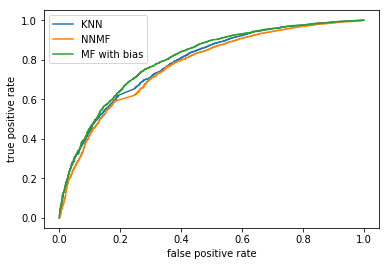

In [89]:
# KNN
knn = KNNWithMeans(k=best_k, min_k=1, sim_options={'name': 'pearson', 'user_based': True}, verbose=False)
trainset, testset = train_test_split(rating_dataset, test_size=0.1)
knn.fit(trainset)
predictions_knn = knn.test(testset)

# NNMF
nmf = NMF(n_factors=best_k)
trainset, testset = train_test_split(rating_dataset, test_size=0.1)
nmf.fit(trainset)
predictions_nmf = nmf.test(testset)

# MF with Bias
svd = SVD(n_factors=best_k_MF_bias)
trainset, testset = train_test_split(rating_dataset, test_size=0.1)
svd.fit(trainset)
predictions_mf = svd.test(testset)

threshold = 3

# predictions array
predicts = [predictions_knn, predictions_nmf, predictions_mf]

#labels for legend
labels = ['KNN', 'NNMF', 'MF with bias']

plt.figure()

for p in predicts:
    true_bin = [1 if pred.r_ui >= threshold else 0 for pred in p]
    scores = [pred.est for pred in p]
    
    
    fpr, tpr, thr = roc_curve(true_bin, scores)
    plt.plot(fpr, tpr)
#     plt.text(0.5, 0.1, 'area under curve = %0.4f' % roc_auc_score(true_bin, scores))
#     plt.text(0.5, 0.2, 'threshold = {}'.format(t))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.legend(labels)
    

## Question 36